<a href="https://colab.research.google.com/github/samwinston1996/samwinston1996/blob/main/Project_Pest_Management_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/Final Year Project/Data"

ls: cannot access '/content/drive/My Drive/Final Year Project/Data': No such file or directory


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import numpy as np  
from keras.preprocessing import image

In [ ]:
#dimensions of our images
img_width, img_height =150, 150

In [ ]:
train_data_dir="/content/drive/My Drive/Karunya/Final Year Project/Data/train"
validation_data_dir="/content/drive/My Drive/Karunya/Final Year Project/Data/test"
nb_train_samples=351
nb_validation_samples=131
epochs=1
batch_size=20

In [ ]:
input_shape=(img_width, img_height, 3)


In [ ]:
train_datagen= ImageDataGenerator( rescale=1. /255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
test_datagen= ImageDataGenerator(rescale=1. / 255)

In [ ]:
train_generator= train_datagen.flow_from_directory(train_data_dir, target_size=(img_width,img_height), batch_size= batch_size, class_mode='binary')

Found 352 images belonging to 2 classes.


In [ ]:
validation_generator=test_datagen.flow_from_directory( validation_data_dir, target_size=(img_width,img_height),batch_size= batch_size, class_mode='binary')

Found 130 images belonging to 2 classes.


In [ ]:
model= Sequential()
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'] )

In [ ]:
model.fit_generator(train_generator,steps_per_epoch= nb_train_samples , epochs=epochs, validation_data=validation_generator, validation_steps= nb_validation_samples )

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


351/351 [==============================] - 142s 340ms/step - loss: 1.0095 - accuracy: 0.5541 - val_loss: 0.8576 - val_accuracy: 0.3846


In [ ]:
model.save_weights('first_try.h5')

In [ ]:
path = '/content/drive/My Drive/Karunya/Final Year Project/Data/test/Locust/unnamed.jpg'
img_pred=image.load_img(path, target_size=(150,150))


In [ ]:
img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

In [ ]:
rslt=model.predict(img_pred)
print(rslt)

[[0.]]


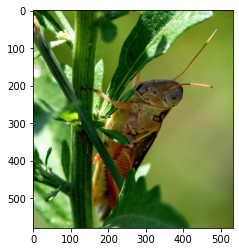

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(path)
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

In [ ]:
if rslt[0][0] == 0:
  prediction="Cockroach"
else:
  prediction="Locusts"

print(prediction)

Cockroach
